<a href="https://colab.research.google.com/github/saumya-nauni/ML-Sem-V/blob/master/Lab/Experiment%204/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPERIMENT 4**



Aim: Python for data visualization


Objectives:




> Exploring data sets using matplotlib, seaborn

> Exploring numpy and pandas libraries of python





In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [36]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [37]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

In [38]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)

In [39]:
canada['TotalImmigration'] = canada.sum(axis='columns')

In [40]:
canada.isnull().sum().sum() #Putting the second sum value so that all the null from all columns are also added

0

In [41]:
canada.set_index('Country', inplace = True)
canada.head()

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [42]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'Development-Status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

In [43]:
years = list(map(str, range(1980,2014)))

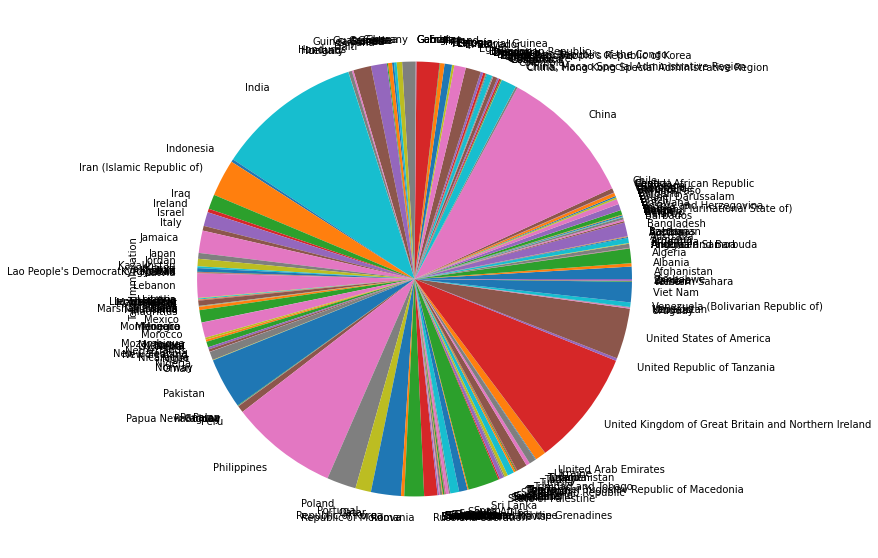

In [44]:
canada['TotalImmigration'].plot(kind='pie',figsize=(10,10))

In [45]:
can_continent = canada.groupby('Continent', axis='index').sum()
can_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


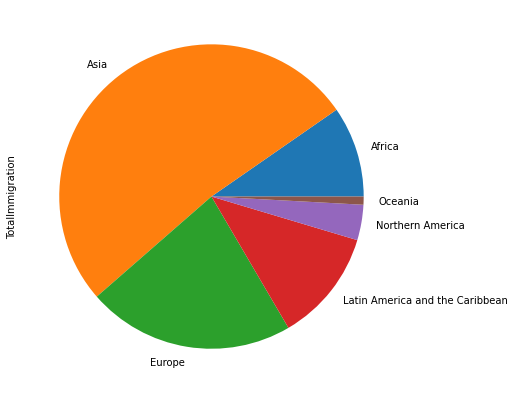

In [46]:
can_continent['TotalImmigration'].plot(kind='pie', figsize=(7, 7))

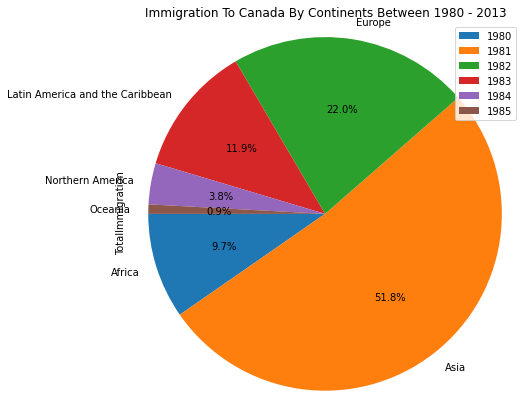

In [47]:
can_continent['TotalImmigration'].plot(kind='pie', figsize=(7, 7),
                                      startangle = 180, autopct = '%1.1f%%')
plt.title('Immigration To Canada By Continents Between 1980 - 2013')
plt.axis('equal')
plt.legend(labels = can_continent.columns, loc='upper right')
plt.show()

In [48]:
can_devstatus = canada.groupby('Development-Status', axis='index').sum()
can_devstatus.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Development-Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,75465,65368,72649,72520,70325,62359,63070,55322,42678,42605,45469,50634,43620,42137,47325,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,112589,142141,149038,149529,123340,125353,137015,137563,118049,137213,171243,192009,179491,175160,184758,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


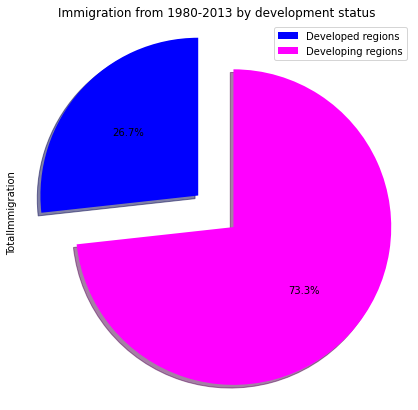

In [49]:
explodeList = [0.3,0]
colorList=['blue','magenta']
can_devstatus['TotalImmigration'].plot(kind='pie', figsize=(7,7), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, colors = colorList, explode = explodeList)
plt.title('Immigration from 1980-2013 by development status')
plt.axis('equal')
plt.legend(labels= can_devstatus.index,loc ='upper right')
plt.show()

In [50]:
can_contreg = canada.groupby('Continent-Region', axis='index').sum()
can_contreg.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Continent-Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,1304,1119,848,457,481,467,532,675,610,790,890,867,1075,1238,936,878,918,804,625,687,811,1159,1068,1221,1280,1279,1193,1383,1498,1538,1423,1226,1399,1536,34215
Caribbean,7045,8310,8326,6998,5553,6048,8716,10932,9229,10786,11596,12887,14975,16569,9936,9976,9293,8121,6298,6714,7072,8433,7507,6502,6630,6816,6652,7826,8862,8847,10549,11958,11898,10393,308253
Central America,734,921,1612,3648,4087,4862,5909,6804,5596,5821,7750,13474,12521,7769,3529,2836,3390,3469,2665,2866,3080,3157,3010,2747,3346,3990,4140,5039,4891,4814,5692,5821,6019,5644,161653
Central Asia,0,0,0,0,0,0,0,0,0,0,0,0,15,81,89,105,230,728,1052,717,619,728,706,825,995,1134,903,936,805,962,905,769,1029,691,15024
Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,4404,6535,9729,7244,4046,4373,4254,3094,3056,3936,4825,4868,4049,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846,9448,167389


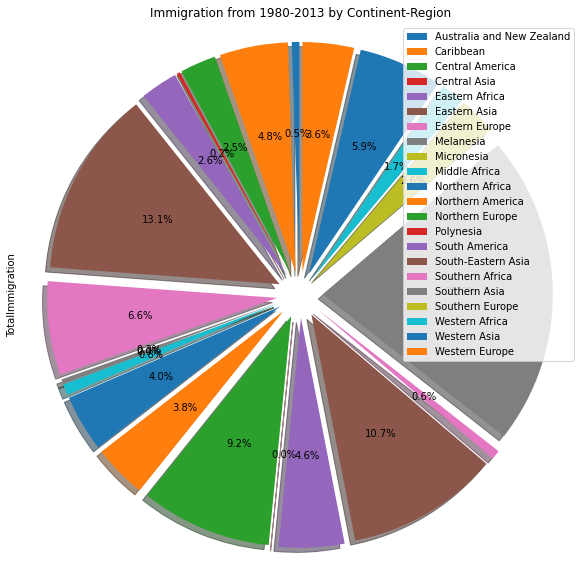

In [51]:
explodeList = [0.1]*22
#colorList=['blue','magenta']
can_contreg['TotalImmigration'].plot(kind='pie', figsize=(10,10), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, explode = explodeList)
plt.title('Immigration from 1980-2013 by Continent-Region')
plt.axis('equal')
plt.legend(labels= can_contreg.index,loc ='upper right')
plt.show()

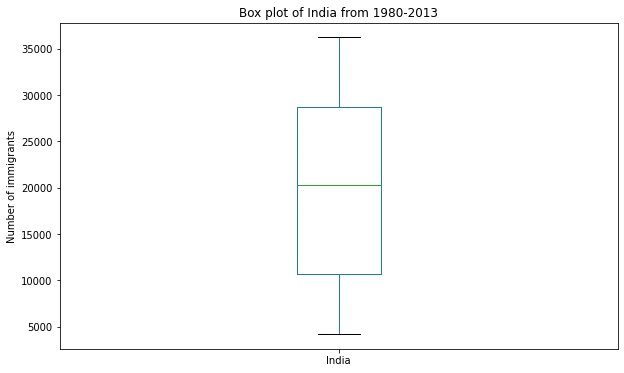

In [52]:
india = canada.loc['India', years]

india.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

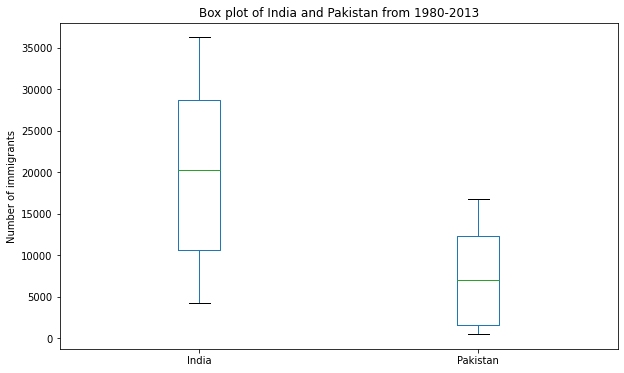

In [53]:
indopak = canada.loc[['India','Pakistan'], years].transpose()

indopak.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India and Pakistan from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

In [54]:
indopak.describe()

Country,India,Pakistan
count,34.000000,34.000000
mean,20350.117647,7105.882353
std,10007.342579,5315.849587
min,4211.000000,514.000000
25%,10637.750000,1565.750000
50%,20235.000000,7014.000000
75%,28699.500000,12259.000000
max,36210.000000,16708.000000


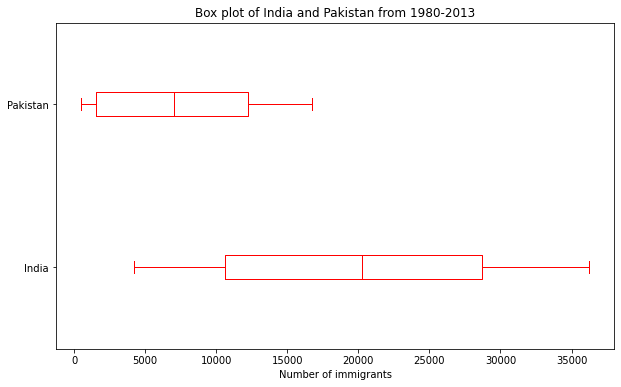

In [55]:
indopak.plot(kind='box', figsize=(10,6), color='red', vert=False)

plt.title('Box plot of India and Pakistan from 1980-2013')
plt.xlabel('Number of immigrants')
plt.show()

In [56]:
asia = canada[(canada['Continent']=='Asia')].sort_values('TotalImmigration', ascending=False).head()
eur = canada[(canada['Continent']=='Europe')].sort_values('TotalImmigration', ascending=False).head()
afr = canada[(canada['Continent']=='Africa')].sort_values('TotalImmigration', ascending=False).head()
ocn = canada[(canada['Continent']=='Oceania')].sort_values('TotalImmigration', ascending=False).head()

asia = asia[years].transpose()
eur = eur[years].transpose()
afr = afr[years].transpose()
ocn = ocn[years].transpose()

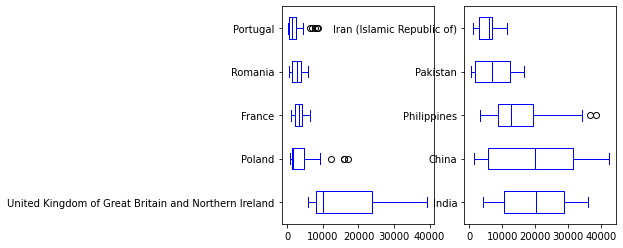

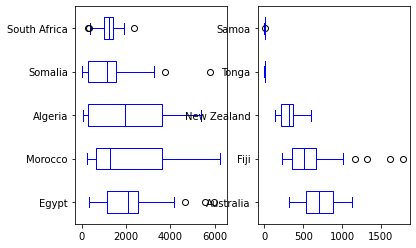

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

fig2 = plt.figure()
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)

eur.plot(kind='box', color='blue', vert=False, ax=ax1)
asia.plot(kind='box', color='blue', vert=False, ax=ax2)
afr.plot(kind='box', color='blue', vert=False, ax=ax3)
ocn.plot(kind='box', color='blue', vert=False, ax=ax4)

In [58]:
temp = asia.describe()
Q1 = temp.loc['25%', 'Philippines']
Q3 = temp.loc['75%', 'Philippines']
IQR = Q3-Q1

Outlier1 = Q3 + 1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

asia[asia['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


In [59]:
indopak.reset_index(inplace=True)
indopak.rename(columns={'Country':'index','index':'Year'}, inplace=True)
indopak.head()

Country,Year,India,Pakistan
0,1980,8880,978
1,1981,8670,972
2,1982,8147,1201
3,1983,7338,900
4,1984,5704,668


[ 9.34267991e+02 -1.84491593e+06]


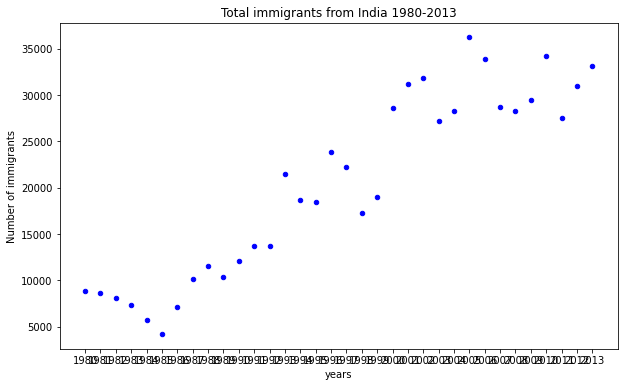

In [60]:
import numpy as np

x = indopak['Year'].astype('int64')
y = indopak['India']
fit = np.polyfit(x,y,deg=1)
print(fit)
indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))
plt.title('Total immigrants from India 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")

#plt.plot(x, fit[0]*x+fit[1], color='red')
plt.show()

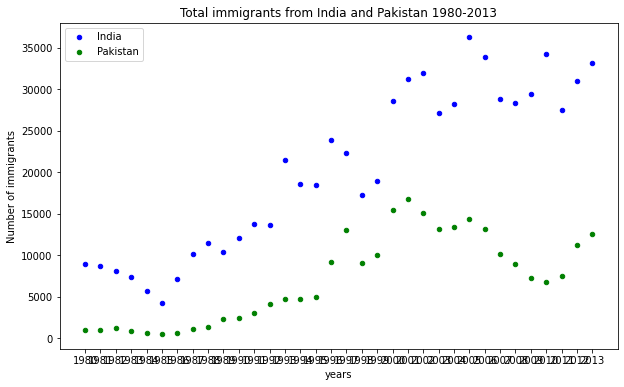

In [61]:
ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()

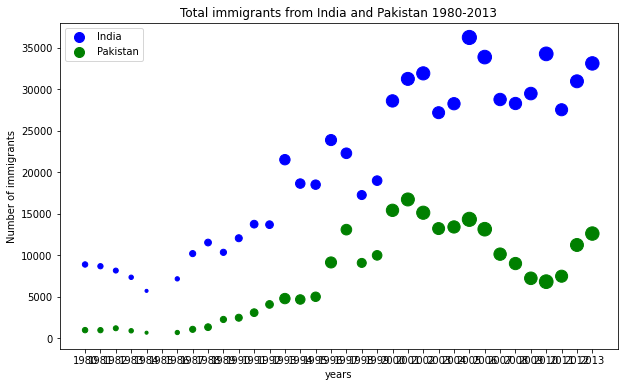

In [62]:
norm_india = (indopak['India'] - indopak['India'].min()) / (indopak['India'].max() - indopak['India'].min())
norm_pak = (indopak['Pakistan'] - indopak['Pakistan'].min()) / (indopak['Pakistan'].max() - indopak['Pakistan'].min())

ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', s=norm_india*200, figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', s=norm_india*200, figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()